# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [24]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [31]:
data = pd.read_csv('weight-height.csv')
male_df =  data.groupby('Gender').get_group('Male')
female_df =  data.groupby('Gender').get_group('Female').reset_index(drop=True)
female_df.index = np.arange(1, len(female_df) + 1)

  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
female_df.Height,male_df.Height

(1       58.910732
 2       65.230013
 3       63.369004
 4       64.479997
 5       61.793096
 6       65.968019
 7       62.850379
 8       65.652156
 9       61.890234
 10      63.677868
 11      68.101172
 12      61.798879
 13      63.371459
 14      58.895886
 15      58.438249
 16      60.809799
 17      70.128653
 18      62.257430
 19      61.735090
 20      63.059557
 21      62.286838
 22      61.827478
 23      66.347537
 24      65.320632
 25      66.103873
 26      64.527182
 27      56.547975
 28      62.739281
 29      61.585199
 30      62.024425
           ...    
 4971    65.618737
 4972    64.640247
 4973    60.653733
 4974    60.737031
 4975    65.393947
 4976    66.251923
 4977    61.475904
 4978    64.494838
 4979    57.375759
 4980    62.056012
 4981    60.472262
 4982    60.443264
 4983    69.868511
 4984    65.830726
 4985    59.047029
 4986    68.041065
 4987    63.352698
 4988    65.610243
 4989    59.538729
 4990    60.955084
 4991    63.179498
 4992    62.

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


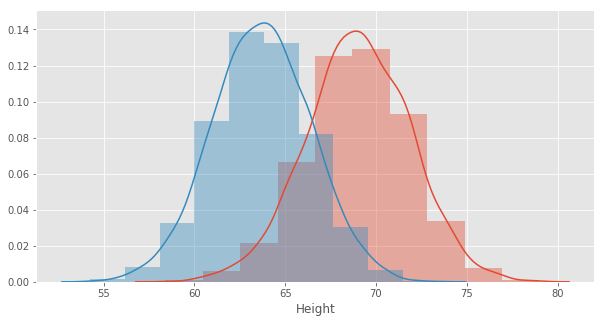

In [34]:
fig = plt.figure(figsize = (10,5))
sns.distplot(male_df.Height,bins=10,hist=True)
sns.distplot(female_df.Height,bins=10,hist=True)

In [ ]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

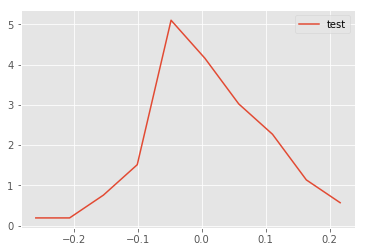

In [38]:
def density(x,bins):
    n, bins = np.histogram(x, bins, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy


#Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s,10)
plt.plot(x,y, label = 'test')
plt.legend()

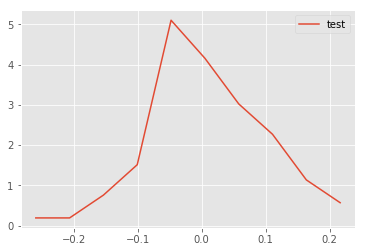

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

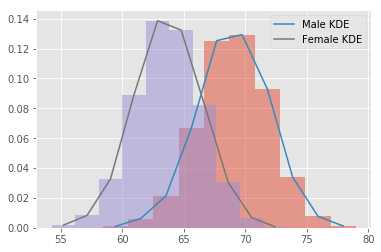

In [88]:
plt.hist(male_df.Height,bins=10,density=True, alpha=0.5)
x,y = density(male_df.Height,10)
plt.plot(x,y, label = 'Male KDE')
plt.hist(female_df.Height,bins=10,density=True,alpha=0.5)
a,b = density(female_df.Height,10)
plt.plot(a,b, label = 'Female KDE')
plt.legend()
#####go back to this to figure out how to do it with plt.hist

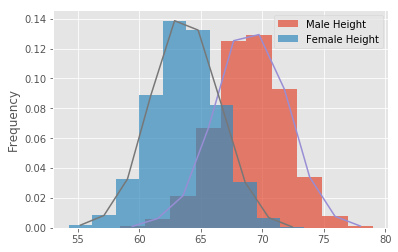

#### Repeat above exerice for male and female weights

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


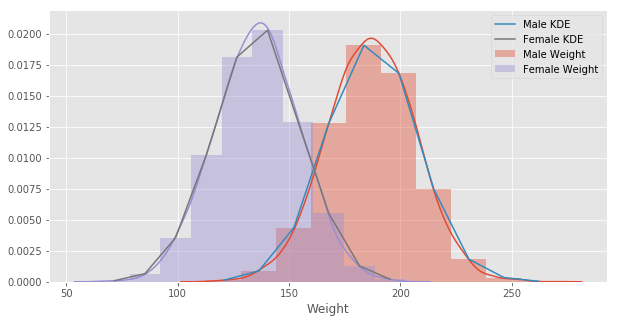

In [84]:
fig = plt.figure(figsize = (10,5))
sns.distplot(male_df.Weight,bins=10,hist=True,label='Male Weight')
x,y = density(male_df.Weight,10)
plt.plot(x,y, label = 'Male KDE')

sns.distplot(female_df.Weight,bins=10,label='Female Weight')
a,b = density(female_df.Weight,10)
plt.plot(a,b, label = 'Female KDE')
plt.legend()

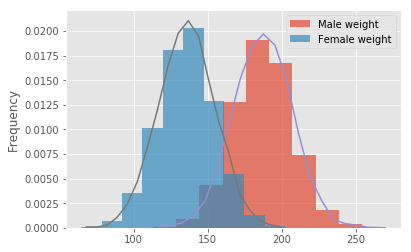

#### Write your observations in the cell below.

### __Record your observations - are these inline with your personal observations?__
based on these observations, men tend to be taller and weigh more than the female population. We can also concude that height and weight are correlated, which is true of my personal observations. But obviously there is an area where they overlap, and there are outliers.

### __So whats the takeaway when comparing male and female heights and weights__
the __mean__ height and weight of men is higher than that of women.


#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


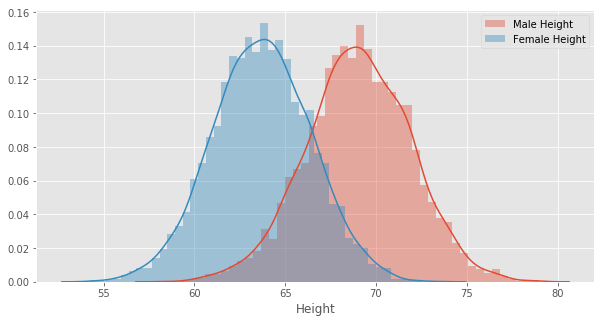

In [91]:
fig = plt.figure(figsize = (10,5))
sns.distplot(male_df.Height,hist=True,label='Male Height')
# x,y = density(male_df.Height,10)
# plt.plot(x,y, label = 'Male KDE')

sns.distplot(female_df.Height,label='Female Height')
# a,b = density(female_df.Height,10)
# plt.plot(a,b, label = 'Female KDE')
plt.legend()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


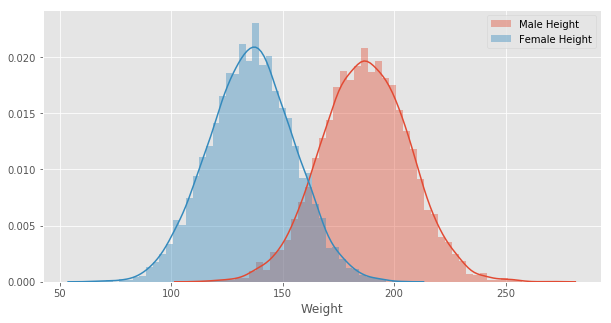

In [92]:
fig = plt.figure(figsize = (10,5))
sns.distplot(male_df.Weight,hist=True,label='Male Height')
# x,y = density(male_df.Weight,10)
# plt.plot(x,y, label = 'Male KDE')

sns.distplot(female_df.Weight,label='Female Height')
# a,b = density(female_df.Weight,10)
# plt.plot(a,b, label = 'Female KDE')
plt.legend()

### Your comments on the two approaches here. 
__are they similar ? what makes them different if they are ?__
they are very simialr, but it is much eaier to use seaborn, because it computes the kde line on it's own and if you do not select # of bin it will also choose one that is smoother.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.